# MNIST Dataset - Handwritten Digits Recognition

**The objective of this study is to perform image recognition on handwritten digits.**

**We will be answering the following questions :**
- What is the best performing model ? 
- Will the models recognize our own hadwriting ? 
- What is the best model to generate new data ?
- Will you be able to distinguish fake from real data ?

**List of algorithms that we will compare :**
- Linear Classifier 
- KNN
- SVMs
- Neural Nets 
- Convolutional Neural Nets
- GAN / VAE

**The MNIST database of handwritten digits has the following characteristics :**
- 60,000 training examples 
- 10,000 testing samples 
- The size of the images is 28 x 28 pixels

## Import the data

In [ ]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

In [ ]:
!gunzip t*-ubyte.gz

In [ ]:
#!pip install mlxtend

In [2]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
os.getcwd()

'/Users/victor/Desktop/MNIST-Handwritten-digits-recognition-'

In [3]:
X_train, y_train = loadlocal_mnist(
        images_path='data/train-images-idx3-ubyte', 
        labels_path='data/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(images_path = 'data/t10k-images-idx3-ubyte', 
                                labels_path = 'data/t10k-labels-idx1-ubyte')

In [4]:
print('Dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('\n1st row', X_train[0])

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

Each image can be coded into a vector of size 28x28 = 784. Each number in the vector represents the corresponding pixel, and takes its value according to the intensity of grey of that pixel. 

In [5]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y_train))
print('Class distribution: %s' % np.bincount(y_train))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

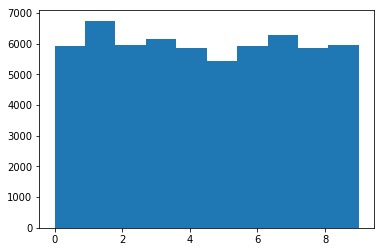

In [6]:
plt.hist(y_train)

In [ ]:
#Store as CSV files
np.savetxt(fname='images_train.csv', 
           X=X_train, delimiter=',', fmt='%d')
np.savetxt(fname='labels_train.csv', 
           X=y_train, delimiter=',', fmt='%d')

In [ ]:
np.savetxt(fname='images_test.csv', 
           X=X_test, delimiter=',', fmt='%d')
np.savetxt(fname='labels_test.csv', 
           X=y_test, delimiter=',', fmt='%d')

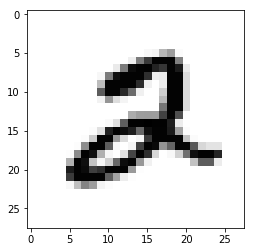

In [8]:
#Show first digit 
pixels = X_train[5].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

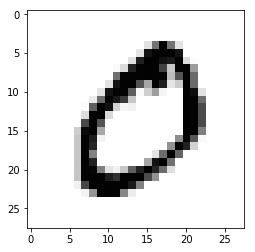

In [9]:
pixels = X_train[1].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

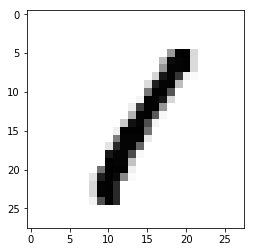

In [10]:
pixels = X_train[3].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

## Reshaping and Normalizing the images

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


## Linear Classifier

In [3]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

In [4]:
train_images = pd.read_csv("images_train.csv")
train_labels = pd.read_csv("labels_train.csv")
test_images = pd.read_csv("images_test.csv")
test_labels = pd.read_csv("labels_test.csv")

In [15]:
param_grid = {"C" : [0.1], "gamma" : [0.1]}
lc = LinearSVC()
grid = GridSearchCV(estimator=lc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
lc = lc.fit(train_images, train_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
lc.predict(test_images)
lc.score(test_images, test_labels)

## SVM

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

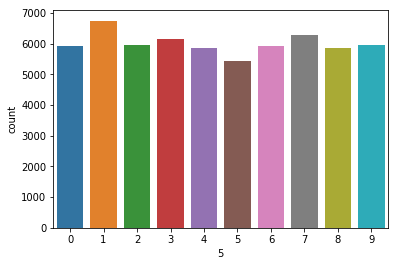

In [17]:
sns.countplot(train_labels["5"])

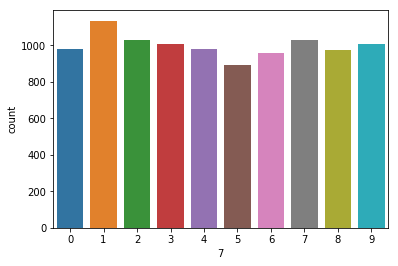

In [18]:
sns.countplot(test_labels["7"])

In [23]:
parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]} #Decide on the value of C and gamma
steps = [('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) # define Pipeline object
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [ ]:
grid.fit(train_images, train_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train = X_train.reshape([60000, 28, 28])
X_train.shape

In [ ]:
X_test = X_test.reshape([10000, 28, 28])
X_test.shape

In [ ]:
#Build a network with a sequence of two layers. The first dense has 128 nodes and the second dense 
#is a 10-node softwmax layer : it returns 10 probability scores that sum to 1. They correspond to 
#the probability that the image belongs to the class. 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28))
])

d1 = keras.layers.Dense(128, activation=tf.nn.relu)
d_class = keras.layers.Dense(10, activation=tf.nn.softmax)

model.add(d1)
model.add(d_class)


In [ ]:
# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(images_train, labels_train)
predictions = model.predict(images_test)
#print(predictions[1])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 5)

In [ ]:
(test_loss, test_acc) = model.evaluate(X_test, y_test)
print("Test accuracy :", test_acc)

#### Optimize the algorithm : 

In [ ]:
#Change network depth 
def create_dense(layer_sizes):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28))
    ])
    
    d1 = keras.layers.Dense(layer_sizes[0], activation=tf.nn.relu)
    model.add(d1)

    for s in layer_sizes[1:]:
        d = keras.layers.Dense(units = s, activation = tf.nn.relu)
        model.add(d)

    d_class = keras.layers.Dense(units=10, activation=tf.nn.softmax)
    model.add(d_class)
    return model

In [ ]:
#Evaluate the model 
def evaluate(model, epochs=5):
    model.summary()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
for layers in range(1, 5):
    model = create_dense([128] * layers)
    evaluate(model, epochs = 3)

Adding too many layers overfits the model. The best accuracy is obtained with only one layer in the neural network. With more layers, the neural network fits the training data too precisely, and no longer generalized to data from outside the training set (here, to X_test). Especially with 5 hidden layers we can see that the training accuracy is way larger than the test accuracy, which is an indicator for overfitting. 

In [ ]:
#Change layer width
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

More nodes in the hidden layers produce a better performance on the test data. The model reaches the best accuracy with one hidden layer of 2048 nodes. 

In [ ]:
#Final model 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28))
])

d1 = keras.layers.Dense(2048, activation=tf.nn.relu)
d_class = keras.layers.Dense(10, activation=tf.nn.softmax)

model.add(d1)
model.add(d_class)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train)

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy :", test_acc)

## CNN

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
np.random.seed(42)

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(5, 5),
                 padding='Same',
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 padding='Same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64,
                 kernel_size=(5, 5),
                 padding='Same',
                 activation='relu'))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [ ]:
epochs = 30
batch_size = 86

model.fit(X_train, y_train, 
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=1)

Prediction error : 98,5%


In [ ]:
image_index = 222
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')

In [ ]:
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## K Nearest Neighbors

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
#import imutils
import cv2
import matplotlib.pyplot as plt

images_train, labels_train = X_train, y_train 

images_test, labels_test = X_test, y_test 


In [ ]:
# now, let's take 10% of the training data and use that for validation

(images_train1, valData, labels_train1, valLabels) = train_test_split(images_train, labels_train,
test_size=0.1, random_state=84)

# show the sizes of each data split

print("training data points: {}".format(len(images_train1)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(labels_test)))

In [ ]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 20, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(images_train1, labels_train1)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
        

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

In [ ]:
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(labels_test, predictions))

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(images_train1, labels_train1)
          # evaluate the model and update the accuracies list
score = model.score(valData, valLabels)
print("k=%d, accuracy=%.2f%%" % (1, score * 100))
accuracies.append(score)

## GAN

In [ ]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"
os.environ['KERAS_BACKEND']='tensorflow'
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

%matplotlib inline

In [ ]:
random_dim = 100
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(60000, 784)


def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

Implement the Generator

In [ ]:
def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim,
                       kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

And the discriminator

In [ ]:
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784,
                       kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

Train model against each other

In [ ]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    discriminator.trainable = False
    gan_input = Input(shape=(random_dim,))
    x=generator(gan_input)
    gan_output = discriminator(x)
    gan=Model(inputs=gan_input, outputs = gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return gan

In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10,10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28,28)
    
    plt.figure(figsize=figsize)
    
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
        
    plt.tight_layout()
    plt.savefig('gan_res/gan_generated_image_epoch_'+str(epoch)+'.png')
    #you have to create the repository "gan_res" in "MNIST-Handwritten-digits-recognition-"

In [ ]:
def train(epochs=1, batch_size=128):
    
    batch_count = int(X_train.shape[0]/batch_size)
    
    adam = get_optimizer()
    generator = get_generator(adam)
    discrimnator = get_discriminator(adam)
    gan = get_gan_network(discrimnator, random_dim, generator, adam)
    
    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' %e, '-'*15)
        for _ in tqdm_notebook(range(batch_count)):
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
            
            generated_images = generator.predict(noise)
            X=np.concatenate([image_batch, generated_images])
            
            y_dis = np.zeros(2*batch_size)
            
            y_dis[:batch_size] = 0.9
            
            discrimnator.trainable = True
            discrimnator.train_on_batch(X, y_dis)
            
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            
            discrimnator.trainable = False
            gan.train_on_batch(noise, y_gen)
        plot_generated_images(e, generator)

In [ ]:
train(20, 128)

VAE 

## Input our own images

In [66]:
#https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4

In [41]:
import cv2
import math
from scipy import ndimage

Yann Lecun : "All images are size normalized to fit in a 20x20 pixel box and there are centered in a 28x28 image using the center of mass. These are important information for our preprocessing".

In [42]:
#Get the center of mass
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

In [43]:
#Shift the image
def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [63]:
images = np.zeros((9,784))

for i in range(9):
    gray = cv2.imread("Our_own_images/img" + str(i) + ".jpeg", 0)  #Open image
    gray = cv2.resize(255-gray, (28, 28)) #Resize image and invert it with a black background
    (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #Add a treshold to have only black or white in the image, no gray 
    
    #Remove completely black rows and columns at the sides of the image
    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape
    
    
    #Resize the image so that it fits into a 20x20 box
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        gray = cv2.resize(gray, (cols, rows))
        
        
    #Add missing black rows and columns to get a 28x28 image
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
    
    #Find the center of mass and shift the image in the given directions
    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted

    #Divide by 255 to obtain a range from 0 to 1, just like for the images in the MNIST dataset   
    flatten = gray.flatten() / 255.0
    
    images[i] = flatten


In [65]:
#See if our model recognizes our handwriting !
model.predict(images)

NameError: name 'model' is not defined